In [32]:
# importing major libraries 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [33]:
# pd.read_csv('Ice_cream selling data.csv')
df = pd.read_csv('Polynomial.csv').drop('Unnamed: 0',axis=1)

In [34]:
x = df.iloc[:,0:1] # dataframe-->x 
y = df.Y

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape[0]

160

In [38]:
poly = PolynomialFeatures(degree=40) # complex 

In [39]:
poly

PolynomialFeatures(degree=40)

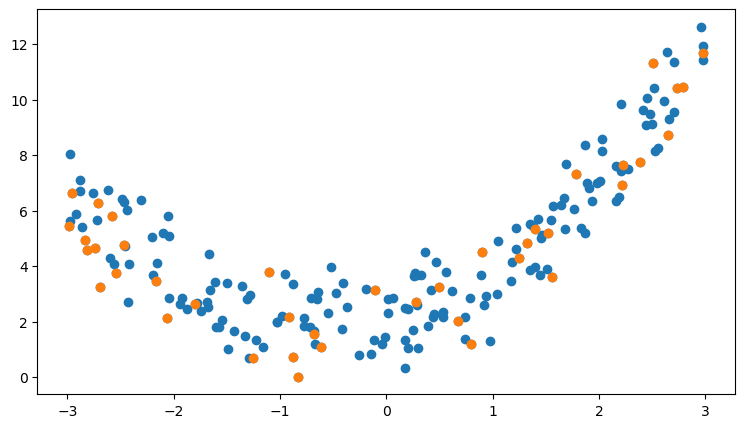

In [40]:
plt.figure(figsize=(9,5))
plt.scatter(df.X,df.Y)
plt.scatter(x_test.values.ravel(),y_test)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [42]:
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [43]:
lr.fit(x_train_poly,y_train)

LinearRegression()

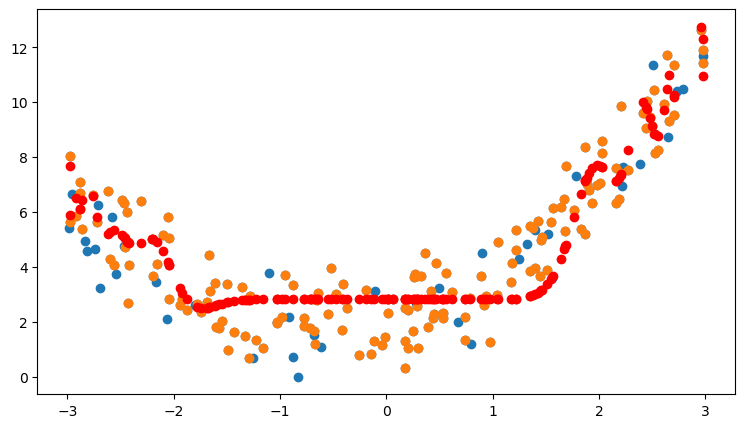

In [58]:
plt.figure(figsize=(9,5))
plt.scatter(df.X,df.Y)
plt.scatter(x_train.values.ravel(),y_train)
plt.scatter(x_train.values.ravel(),lr.predict(x_train_poly),c='r')
plt.show()
y_pred = lr.predict(x_test_poly)

In [45]:
lr.score(x_train_poly,y_train) # training (low bias)

0.8200076400401034

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # overfitting --> training (low bias) (high variance)

0.42879772891412316

In [47]:
from sklearn.linear_model import Lasso

l1 = Lasso()
l1

Lasso()

In [48]:
l1.fit(x_train_poly,y_train)

C:\Users\Anshum Banga\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+02, tolerance: 1.191e-01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [49]:
y_pred1 = l1.predict(x_test_poly)

In [50]:
r2_score(y_test,y_pred1)

0.7918250044198119

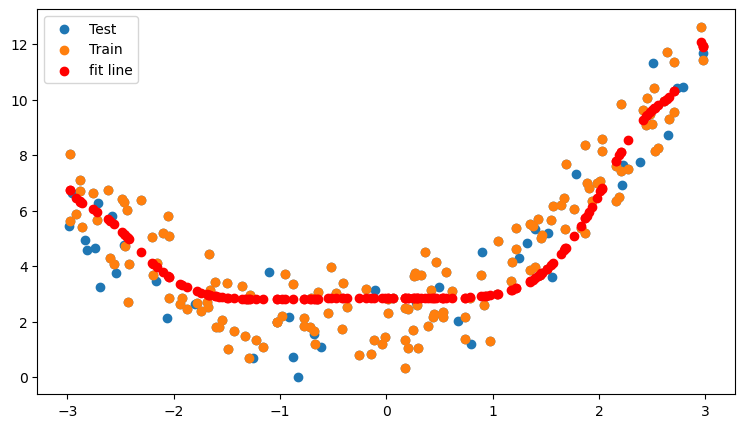

In [62]:
plt.figure(figsize=(9,5))
plt.scatter(df.X,df.Y,label='Test')
plt.scatter(x_train.values.ravel(),y_train,label='Train')
plt.scatter(x_train.values.ravel(),l1.predict(x_train_poly),c='r',label='fit line')
plt.legend()
plt.show()
y_pred2 = l1.predict(x_test_poly)

In [21]:
l1.score(x_train_poly,y_train)

0.8251514145431214

In [22]:
# l2 

from sklearn.linear_model import Ridge
l2 = Ridge()
l2

Ridge()

In [23]:
l2.fit(x_train_poly,y_train)

Ridge()

In [24]:
y_pred2 = l2.predict(x_test_poly)
l2.coef_

r2_score(y_test,y_pred2)

0.5190284954487615

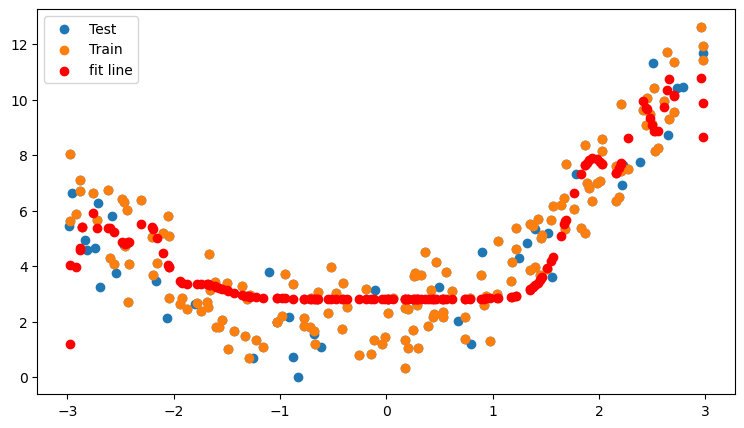

In [63]:
plt.figure(figsize=(9,5))
plt.scatter(df.X,df.Y,label='Test')
plt.scatter(x_train.values.ravel(),y_train,label='Train')
plt.scatter(x_train.values.ravel(),l2.predict(x_train_poly),c='r',label='fit line')
plt.legend()
plt.show()

In [26]:
print('Linear Regression training\t',lr.score(x_train_poly,y_train)*100)
print('Linear Regression testing\t',r2_score(y_test,y_pred)*100)
print('-'*100)
print('l1 Regularisation training\t',l1.score(x_train_poly,y_train)*100)
print('l1 Regularisation testing\t',r2_score(y_test,y_pred1)*100)
print('l1 is performing better'.center(100))
print('-'*100)
print('l2 Regularisation training\t',l2.score(x_train_poly,y_train)*100)
print('l2 Regularisation testing\t',r2_score(y_test,y_pred2)*100)

Linear Regression training	 82.00076400401034
Linear Regression testing	 42.879772891412316
----------------------------------------------------------------------------------------------------
l1 Regularisation training	 82.51514145431213
l1 Regularisation testing	 79.18250044198119
                                      l1 is performing better                                       
----------------------------------------------------------------------------------------------------
l2 Regularisation training	 77.65429080685857
l2 Regularisation testing	 51.90284954487615


In [27]:
# polynomial 
# multiple linear regression

In [28]:
import seaborn as sns
sns.load_dataset('mpg').mpg.describe()
df = sns.load_dataset('mpg')

In [29]:
df.head()
df.shape

(398, 9)